<a href="https://colab.research.google.com/github/loonycorn517/python/blob/master/m4_demo4_WorkingWithData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive') 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
with open('/content/drive/My Drive/sample.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/sample.txt

Hello Google Drive!

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('drive/My Drive/automobile_data.csv')

Dataset details:
Automobile dataset (source: https://archive.ics.uci.edu/ml/datasets/Automobile)

Attribute Information:

symboling: -3, -2, -1, 0, 1, 2, 3.

normalized-losses: continuous from 65 to 256.

make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

fuel-type: diesel, gas.

aspiration: std, turbo.

num-of-doors: four, two.

body-style: hardtop, wagon, sedan, hatchback, convertible.

drive-wheels: 4wd, fwd, rwd.

engine-location: front, rear.

wheel-base: continuous from 86.6 120.9.

length: continuous from 141.1 to 208.1.

width: continuous from 60.3 to 72.3.

height: continuous from 47.8 to 59.8.

curb-weight: continuous from 1488 to 4066.

engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

num-of-cylinders: eight, five, four, six, three, twelve, two.

engine-size: continuous from 61 to 326.

fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

bore: continuous from 2.54 to 3.94.

stroke: continuous from 2.07 to 4.17.

compression-ratio: continuous from 7 to 23.

horsepower: continuous from 48 to 288.

peak-rpm: continuous from 4150 to 6600.

city-mpg: continuous from 13 to 49.

highway-mpg: continuous from 16 to 54.

price: continuous from 5118 to 45400.

Objective field is symboling(risk factor): -2 indicates that vehicle is safe and +3 indicates that vehicle is risky.

In [10]:
print('Shape of the dataset is', data.shape)

Shape of the dataset is (205, 26)


In [11]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Replacing '?' with NaN

In [14]:
data = data.replace('?', np.nan)

data.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Number of NaN values in each column

In [15]:
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Dropping the NaN values

In [0]:
data.dropna(inplace = True)

In [17]:
data.shape

(159, 26)

In [18]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

converting the numeric fields into correct datatype

In [0]:
convert_columns = ['bore', 'horsepower', 'stroke', 'peak_rpm', 'price']

for i in convert_columns:
    data[i] = data[i].astype('float64')
 

In [20]:
data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


**Visualization of Data**

Text(0.5, 0, 'Make')

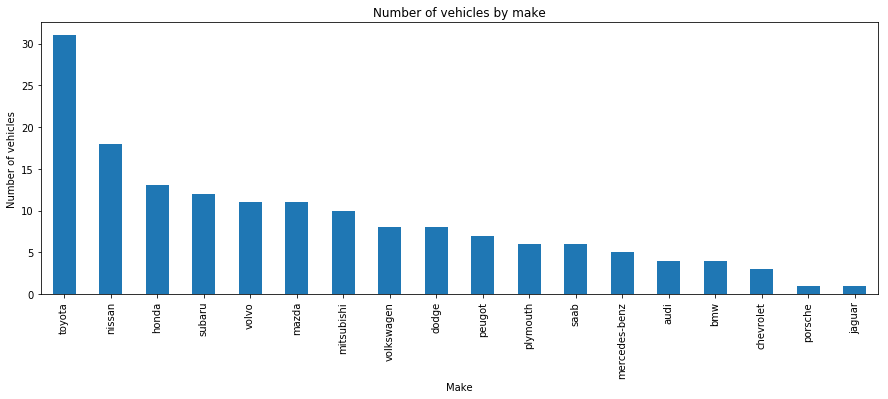

In [21]:
data.make.value_counts().plot(kind='bar', figsize=(15,5))

plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

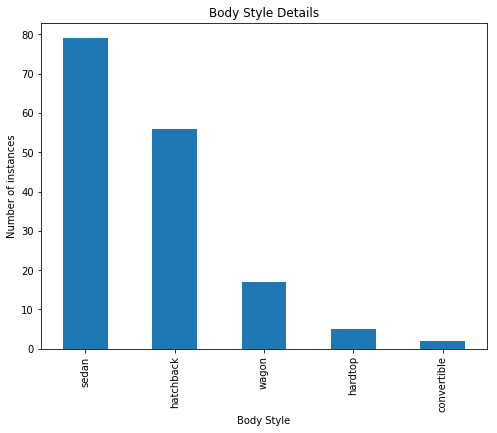

In [22]:
data['body_style'].value_counts().plot(kind = 'bar', figsize=(8,6))

plt.xlabel('Body Style')
plt.ylabel('Number of instances')
plt.title('Body Style Details')

plt.show()

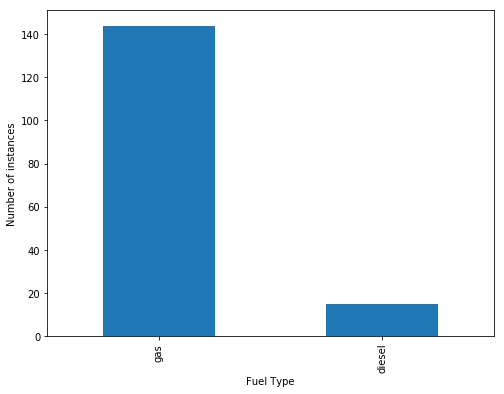

In [23]:
data['fuel_type'].value_counts().plot(kind = 'bar', figsize=(8,6))

plt.xlabel('Fuel Type')
plt.ylabel('Number of instances')


plt.show()

Grouping the symboling values -2,-1,0(safe) and 1,2,3(risky)


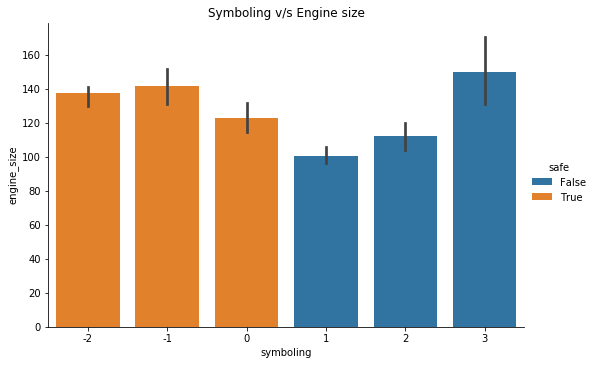

In [24]:
data["safe"] = data["symboling"].isin(["-2", "-1", "0"])


sns.catplot(x = "symboling", y = "engine_size",
            hue = "safe", data = data, dodge = False,
            kind = "bar", aspect = 1.5)

plt.title("Symboling v/s Engine size")
plt.show()

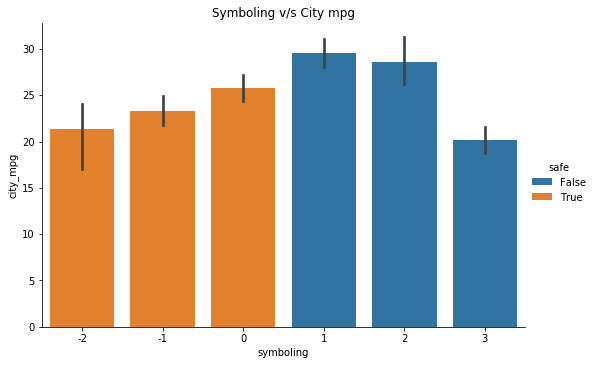

In [25]:
sns.catplot(x = "symboling", y = "city_mpg",
            hue = "safe", data = data,
            dodge = False, kind = "bar", aspect = 1.5)

plt.title("Symboling v/s City mpg")
plt.show()

larger the engine size costlier the price

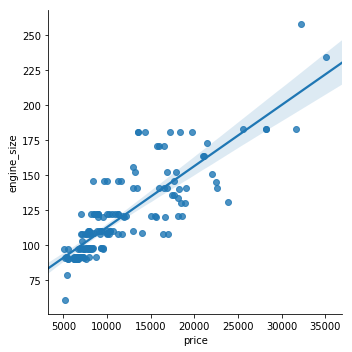

In [26]:
sns.lmplot('price', 'engine_size', data)

Heavier the Automobile less is the mileage

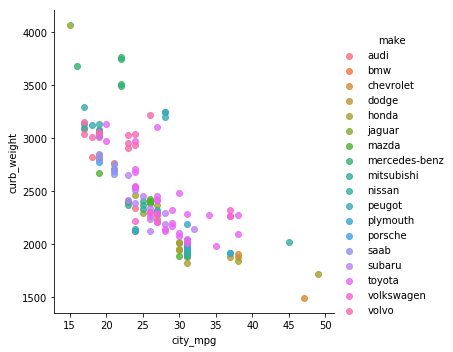

In [27]:
sns.lmplot('city_mpg', 'curb_weight',
            data, hue = 'make',
            fit_reg = False)

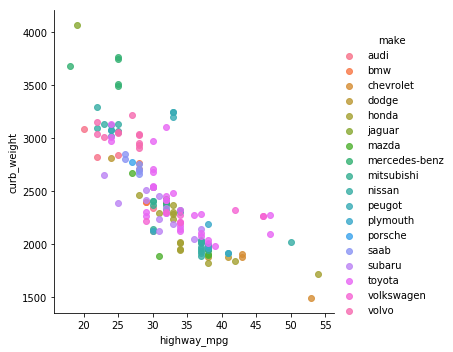

In [28]:
sns.lmplot('highway_mpg', 'curb_weight',
            data, hue = 'make',
            fit_reg = False)

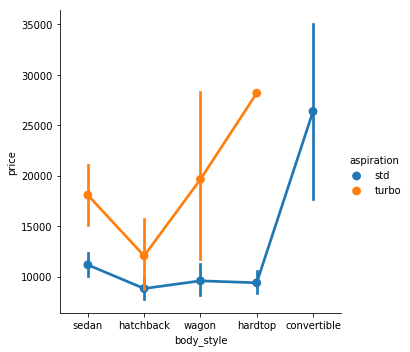

In [29]:
sns.catplot(data = data, x = "body_style", y = "price",
            hue = "aspiration", kind = "point")

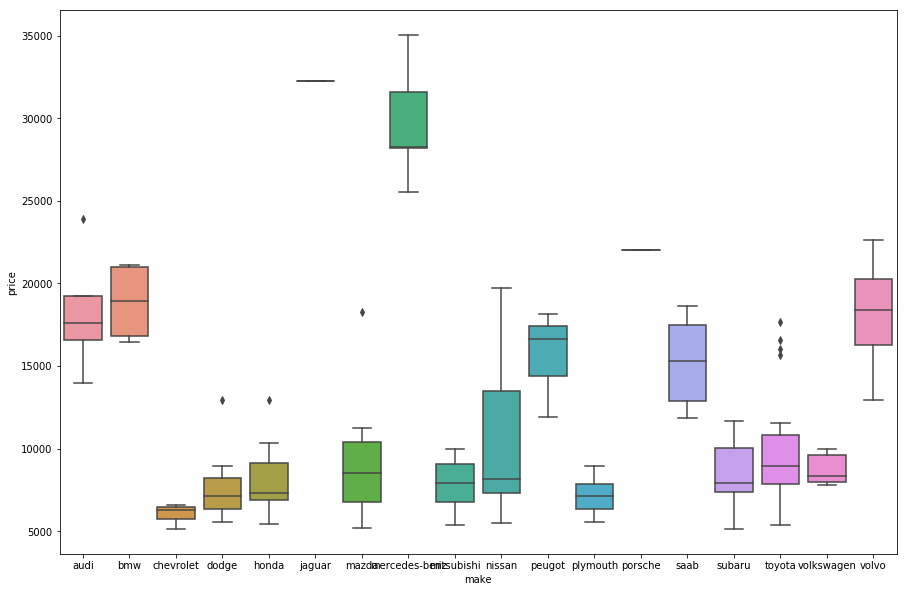

In [31]:
plt.rcParams["figure.figsize"]=(15,10)

ax = sns.boxplot(x = "make",
                 y = "price", 
                 data = data)

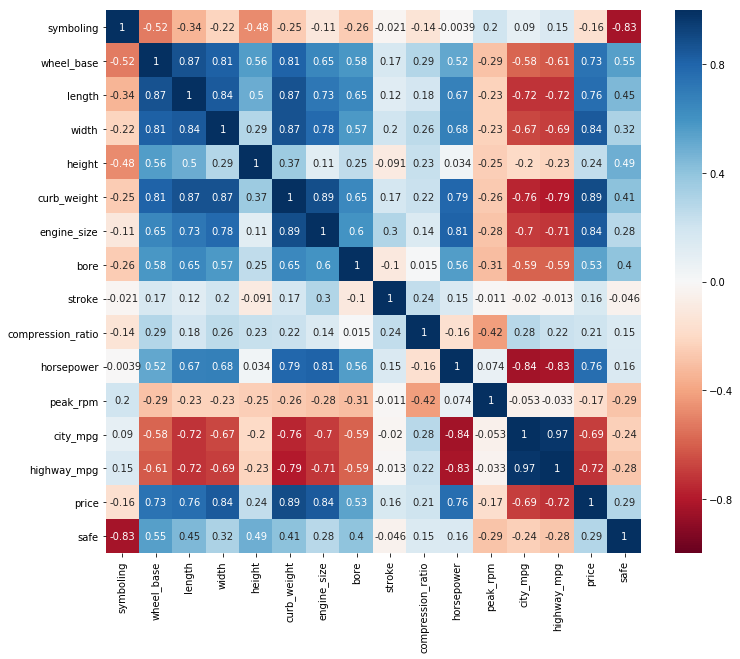

In [32]:
plt.figure(figsize=(12, 10))

sns.heatmap(data.corr(), annot=True,
            cmap='RdBu', vmin=-1, vmax=1)



In [33]:
data = data.drop(['height', 'stroke', 'compression_ratio',
                  'num_of_doors', 'normalized_losses', 'safe',
                  'engine_location','city_mpg'], axis=1)
data.head()


,symboling,make,fuel_type,aspiration,body_style,drive_wheels,wheel_base,length,width,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,horsepower,peak_rpm,highway_mpg,price
3,2,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102.0,5500.0,30,13950.0
4,2,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115.0,5500.0,22,17450.0
6,1,audi,gas,std,sedan,fwd,105.8,192.7,71.4,2844,ohc,five,136,mpfi,3.19,110.0,5500.0,25,17710.0
8,1,audi,gas,turbo,sedan,fwd,105.8,192.7,71.4,3086,ohc,five,131,mpfi,3.13,140.0,5500.0,20,23875.0
10,2,bmw,gas,std,sedan,rwd,101.2,176.8,64.8,2395,ohc,four,108,mpfi,3.50,101.0,5800.0,29,16430.0


In [34]:
data = pd.get_dummies(data, drop_first=True)

data.head()

,symboling,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,peak_rpm,highway_mpg,price,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
3,2,99.8,176.6,66.2,2337,109,3.19,102.0,5500.0,30,13950.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,2824,136,3.19,115.0,5500.0,22,17450.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
6,1,105.8,192.7,71.4,2844,136,3.19,110.0,5500.0,25,17710.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
8,1,105.8,192.7,71.4,3086,131,3.13,140.0,5500.0,20,23875.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
10,2,101.2,176.8,64.8,2395,108,3.50,101.0,5800.0,29,16430.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('price', axis = 1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

1330.6219075897088
3390806.951448631
0.874657542988818


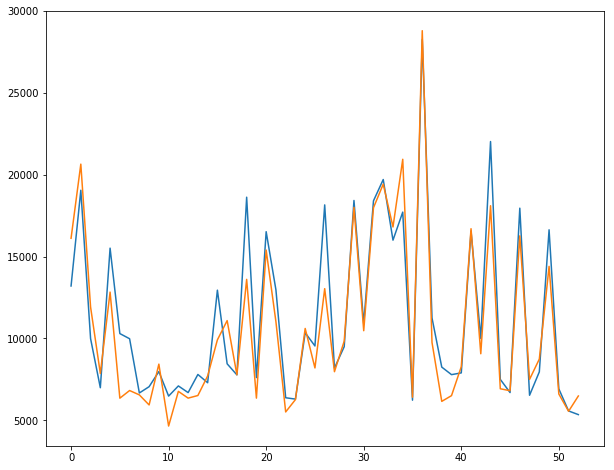

In [39]:
plt.figure(figsize=(10, 8))

plt.plot(y_test.values)
plt.plot(pred)

save this notebook in github python repository by clicking on file

if notebook not viewable in github use nbviewer



In [0]:
https://nbviewer.jupyter.org/

open the below link and show how to open in colab


In [0]:
https://github.com/trekhleb/homemade-machine-learning/blob/master/notebooks/linear_regression/multivariate_linear_regression_demo.ipynb

In [0]:
https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo